## Table of Contents

1. [Problem Statement](#section1)<br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
2. [Load the Packages and Data](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Which type of cars are sold maximum?](#section401)<br/>
    - 4.2 [What is the co-relation between price and mileage?](#section402)<br/>
    - 4.3 [How many cars are registered?](#section403)<br/>
    - 4.4 [Price distribution between registered and non-registered cars.](#section404)<br/>
    - 4.5 [What is the car price distribution based on Engine Value?](#section405)<br/>
    - 4.6 [Which Engine Type of cars users preferred maximum?](#section406)<br/>
    - 4.7 [Establish corelation between all features using heatmap.](#section407)<br/>
    - 4.8 [Distribution of Price](#section408)<br/>    
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement ![CarSalesImage.png](attachment:CarSalesImage.png)

"This dataset contains data for more than 9.5K cars sale in Ukraine. Most of them are used cars so it opens the possibility to analyze features related to car operation. This is a subset of all car data in Ukraine. Using this We will analyze the various parameters of used car sales in Ukraine."
<a id=section101></a>
### 1.1. Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

- __Name__: "Car Sales"
- __Sponsoring Organization__: Don't know
- __Year__: 2019 
- __Description__: "This is a case study of more than 9.5K cars sale in Ukraine."  

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative.

<a id=section2></a> 
### 2. Load the packages and data

__Importing Packages__

In [79]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output 

__Loading Dataset__

In [2]:
CarSales_Data = pd.read_excel(r"C:\Users\ajha2\OneDrive\Desktop\python-su-master\data\Car_Sales.xlsx")
CarSales_Data.shape

(9576, 10)

In [3]:
CarSales_Data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [4]:
CarSales_Data_copy = CarSales_Data.copy()

In [5]:
CarSales_Data_copy.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


<a id=section3></a>

## 3. Data Profiling

<a id=section301></a>

### 3.1 Understanding the Dataset

In [6]:
CarSales_Data.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(9576, 10)

CarSales_Data has __9576 rows__ and __10 columns.__

In [7]:
CarSales_Data.columns  
# This will print the names of all columns.

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [8]:
CarSales_Data

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


In [9]:
CarSales_Data.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [10]:
CarSales_Data.describe(include="all")

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,863,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [11]:
CarSales_Data.sort_values(by=['price'],ascending= False).head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
7621,Bentley,547800.0,sedan,0,6.75,Petrol,yes,2016,Mulsanne,rear
7914,Bentley,499999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
1611,Bentley,499999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
4134,Bentley,449999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
4325,Mercedes-Benz,300000.0,sedan,68,6.00,Petrol,yes,2011,S 600,NaN
5849,Mercedes-Benz,300000.0,other,37,5.00,Petrol,yes,2012,G 500,full
1891,Mercedes-Benz,295000.0,sedan,29,6.00,Petrol,yes,2011,S 600,rear
2165,Mercedes-Benz,295000.0,sedan,29,6.00,Petrol,yes,2011,S-Guard,rear
8205,Land Rover,285000.0,crossover,0,5.00,Petrol,yes,2016,Range Rover,full
1478,Bentley,259000.0,sedan,0,6.00,Petrol,yes,2014,Flying Spur,full


In [12]:
CarSales_Data.groupby('car')['price'].count().sort_values(ascending=False)

car
Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
                ... 
Fisker             1
Samsung            1
Maserati           1
Saab               1
Lamborghini        1
Name: price, Length: 87, dtype: int64

In [13]:
CarSales_Data['car'].value_counts().head()

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
Name: car, dtype: int64

In [14]:
CarSales_Data['car'].value_counts(normalize=True) * 100

Volkswagen       9.774436
Mercedes-Benz    9.617794
BMW              7.247285
Toyota           5.649541
VAZ              5.106516
                   ...   
ZX               0.010443
Other-Retro      0.010443
Mercury          0.010443
Maserati         0.010443
Buick            0.010443
Name: car, Length: 87, dtype: float64

It has been observed that top 3 selling cars are : Volkswagen , Mercedes-Benz & BMW

In [15]:
CarSales_Data.corr()

,price,mileage,engV,year
price,1.000000,-0.312415,0.051070,0.370379
mileage,-0.312415,1.000000,0.047070,-0.495599
engV,0.051070,0.047070,1.000000,-0.042251
year,0.370379,-0.495599,-0.042251,1.000000


<AxesSubplot:>

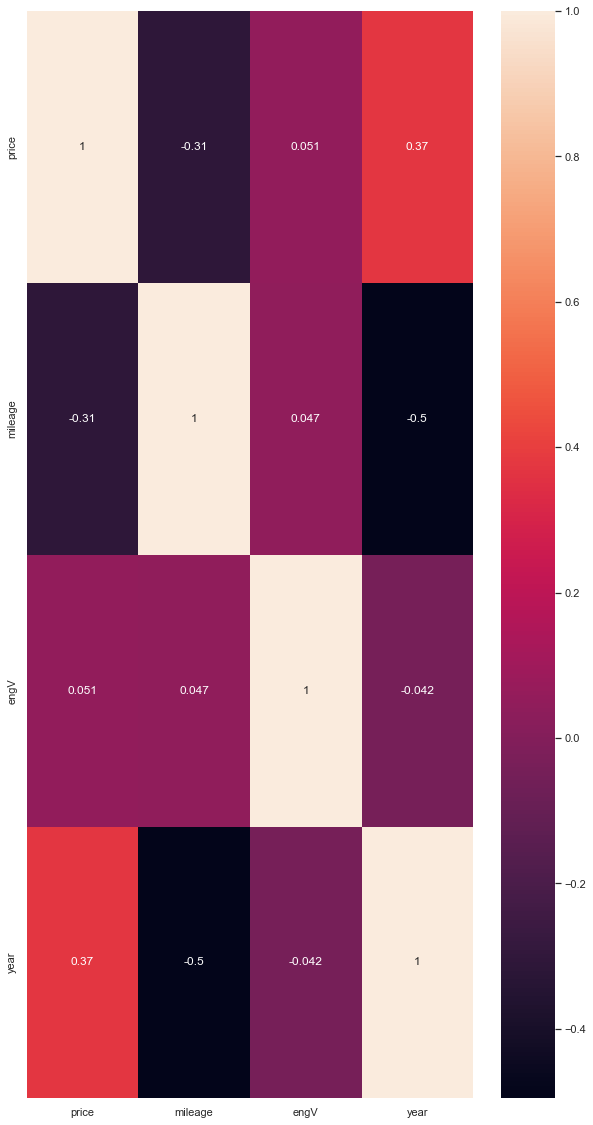

In [38]:
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
sns.set()
plt.subplots(figsize=(10,20))
sns.heatmap(CarSales_Data.corr(),annot=True)

<AxesSubplot:>

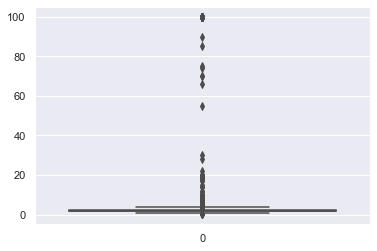

In [17]:
sns.boxplot(data=CarSales_Data.engV)

In [37]:
tail(5)  

# This will print the last n rows of the Data Frame

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [18]:
CarSales_Data.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [19]:
CarSales_Data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

From the above output we can see that __engV__ and __drive__ columns contains __maximum null values__. We will see how to deal with them.

<a id=section302></a>

1. Fill missing
2.Sort()according to price (Asending)
3. Group via drive 
4. Dummy

In [44]:
pip install pandas_profiling    ##Installing pandas_profiling packages

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#Installing'


Now performing __pandas profiling__ to understand data better.

In [6]:
profile = pandas_profiling.ProfileReport(CarSales_Data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
profile.to_file(output_file="CarSales_before_preprocessing.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<a id=section303></a>

### 3.3 Preprocessing

- Dealing with duplicate rows<br/>
    - Find number of duplicate rows in the dataset.
    - Print the duplicate entries and analyze.
    - Drop the duplicate entries from the dataset.

In [10]:
miss1 = CarSales_Data.isnull().sum()
miss = (CarSales_Data.isnull().sum()/len(CarSales_Data))*100
miss_data = pd.concat([miss1,miss],axis=1, keys=['Total', '%'])
print(miss_data)

              Total         %
car               0  0.000000
price             0  0.000000
body              0  0.000000
mileage           0  0.000000
engV            434  4.532164
engType           0  0.000000
registration      0  0.000000
year              0  0.000000
model             0  0.000000
drive           511  5.336257


In [21]:
CarSales_Data.duplicated().sum()

113

In [20]:
CarSales_Data.loc[CarSales_Data.duplicated(), :]

,car,price,body,mileage,engV,engType,registration,year,model,drive
18,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
42,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
86,Toyota,103999.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
98,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
...,...,...,...,...,...,...,...,...,...,...
9156,Volkswagen,15700.0,sedan,110,1.8,Petrol,yes,2011,Passat B7,front
9163,Mercedes-Benz,20500.0,sedan,222,5.5,Petrol,yes,2006,S 500,rear
9164,VAZ,3900.0,hatch,121,1.4,Petrol,yes,2008,1119,front
9169,Hyundai,12900.0,crossover,49,2.7,Petrol,yes,2008,Tucson,full


In [22]:
CarSales_Data_copy.drop_duplicates(inplace=True)

In [23]:
CarSales_Data_copy.loc[CarSales_Data.duplicated(), :]

,car,price,body,mileage,engV,engType,registration,year,model,drive


In [36]:
CarSales_Data_copy

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


In [24]:
b=CarSales_Data_copy["drive"].mode()
b

0    front
Name: drive, dtype: object

In [25]:
CarSales_Data_copy["drive"]=CarSales_Data_copy["drive"].fillna("front")
CarSales_Data_copy.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive             0
dtype: int64

In [39]:
print(CarSales_Data_copy.duplicated().sum())

0


In [40]:
CarSales_Data.loc[CarSales_Data.duplicated(keep=False), :]

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
...,...,...,...,...,...,...,...,...,...,...
9156,Volkswagen,15700.0,sedan,110,1.8,Petrol,yes,2011,Passat B7,front
9163,Mercedes-Benz,20500.0,sedan,222,5.5,Petrol,yes,2006,S 500,rear
9164,VAZ,3900.0,hatch,121,1.4,Petrol,yes,2008,1119,front
9169,Hyundai,12900.0,crossover,49,2.7,Petrol,yes,2008,Tucson,full


In [41]:
CarSales_Data.drop_duplicates(keep='first').shape

(9463, 10)

Duplicate entries are removed now.

- Dealing with missing values<br/>
    - __434__ missing entries of __engV.__ Replace it with __median__ value of engV from the same Car and body group of cars.
    - __511__ missing entries of __drive.__ Replace it with __most common__ value of drive from the same Car and body group of cars.
    - Drop entries having __price__ is 0 or less than 0.

In [42]:
 CarSales_Data_copy.groupby(['car', 'body'])['engV'].head()

0        2.5
1        1.8
2        5.5
3        1.8
4        2.3
        ... 
9488     1.0
9499     3.7
9501     1.2
9508    19.0
9539     1.5
Name: engV, Length: 1008, dtype: float64

In [43]:
CarSales_Data_copy['engV'] = CarSales_Data_copy.groupby(['car', 'body'])['engV'].transform(lambda x: x.fillna(x.median()))

Now let's check if the missing values of __engV__ has been replaced.

In [44]:
CarSales_Data_copy.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

__424__ missing values of __engV__ has been replaced however, still __10__ entries are left as missing. Let's see the missing value data.

In [45]:
CarSales_Data_copy[CarSales_Data_copy.engV.isnull()]

,car,price,body,mileage,engV,engType,registration,year,model,drive


Replacing NaN values of __drive__ with most common values of drive from Car and body group.

In [34]:
def f(x):
    if x.count()<=0:
        return np.nan
    return x.value_counts().index[0]

CarSales_Data_copy['drive'] = CarSales_Data_copy['drive'].fillna(CarSales_Data_copy.groupby(['car','body'])['drive'].transform(f))
#CarSales_Data[CarSales_Data.drive.isnull()]

In [46]:
CarSales_Data_copy[CarSales_Data_copy.drive.isnull()]

,car,price,body,mileage,engV,engType,registration,year,model,drive


Let's check the count of NaN values of __engV__ and __drive__.

In [36]:
CarSales_Data_copy.isnull().sum()

car              0
price            0
body             0
mileage          0
engV            10
engType          0
registration     0
year             0
model            0
drive            0
dtype: int64

Dropping remaining NaN values of __engV__ and __drive__.

In [37]:
CarSales_Data_copy.dropna(subset=['engV'],inplace=True)
CarSales_Data_copy.dropna(subset=['drive'],inplace=True)
CarSales_Data_copy.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

Dropping entries with __price <= 0__ .

In [47]:
CarSales_Data_copy = CarSales_Data_copy.drop(CarSales_Data_copy[CarSales_Data_copy.price <= 0 ].index)

In [48]:
CarSales_Data_copy.price[CarSales_Data_copy.price ==0].count()

0

In [49]:
b = CarSales_Data_copy["mileage"].median()
CarSales_Data_copy["mileage"]=CarSales_Data_copy["mileage"].replace(0,b)

In [50]:
CarSales_Data_copy[CarSales_Data_copy.mileage == 0]

,car,price,body,mileage,engV,engType,registration,year,model,drive


In [51]:
CarSales_Data_copy

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.3,Other,yes,2013,E-Class,front
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


<a id=section304></a>

In [66]:
profile_cleaned = pandas_profiling.ProfileReport(CarSales_Data_copy)
profile_cleaned.to_file(output_file="CarSales_post_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The data are processed now. The dataset doesnot contain missing and zero values. The pandas profiling report generated after processing the data giving us more clear data. We can compare the two reports.

<a id=section4></a>

### 4. Questions

# Try to do all the questions along with the necessary graphs and mention insights too

### 4.1 Which type of cars are sold maximum?

Text(0.5, 1.0, 'Count plot for car variants.')

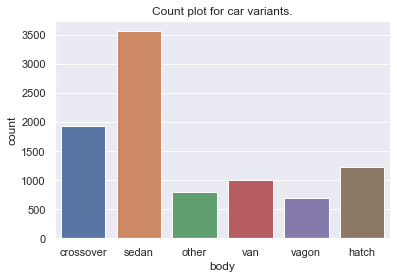

In [52]:
sns.countplot(x='body', data=CarSales_Data_copy).set_title('Count plot for car variants.')

You can see sedan cars are sold maximum and followed that crossover,hatch,van,other and vagon

### 4.2 What is the co-relation between price and mileage?

<AxesSubplot:xlabel='mileage', ylabel='price'>

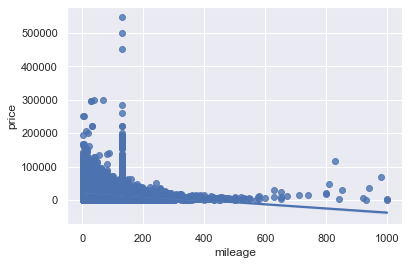

In [53]:
sns.regplot(x= 'mileage',y = 'price',data = CarSales_Data_copy)

You can see there are some outliers here. Excluding those,it seems that majority of car price is below 150000 and gives mileage in the range of 0 to 400.

### 4.3. How many cars are registered?

In [57]:
CarSales_Data_copy["registration"].value_counts()

yes    8661
no      554
Name: registration, dtype: int64

C:\Users\ajha2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Car Registration status')

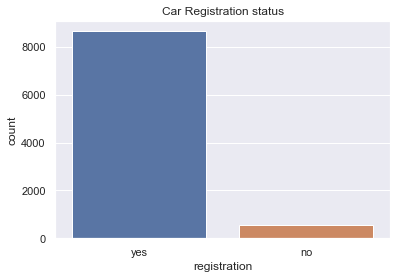

In [55]:
sns.countplot('registration',data=CarSales_Data_copy).set_title('Car Registration status')

8000+ cars are registered and very few are not registered

### 4.4. Price distribution between registered and non-registered cars.

In [58]:
CarSales_Data_copy.groupby(['registration','body'])['price'].mean()

registration  body     
no            crossover     7951.310345
              hatch         2563.750000
              other         3936.687500
              sedan         3938.627049
              vagon         3124.428571
              van           3488.457143
yes           crossover    30597.282810
              hatch         8723.459297
              other        20329.349533
              sedan        12826.420380
              vagon        10279.830563
              van          10970.113397
Name: price, dtype: float64

<AxesSubplot:xlabel='registration', ylabel='price'>

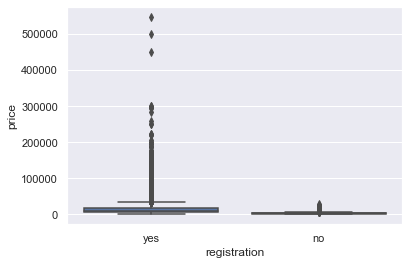

In [59]:
sns.boxplot(x='registration',y='price',data = CarSales_Data_copy)

Majority of the cars are registered and the price of those cars are below 300000. Non-registered cars are cheaper in cost.

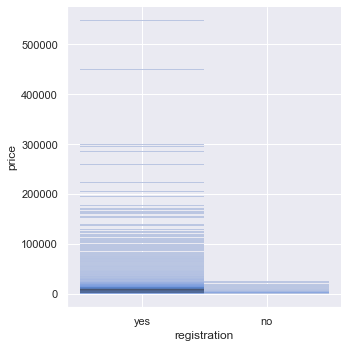

In [61]:
sns.displot(CarSales_Data_copy, x="registration", y='price')


<AxesSubplot:xlabel='registration'>

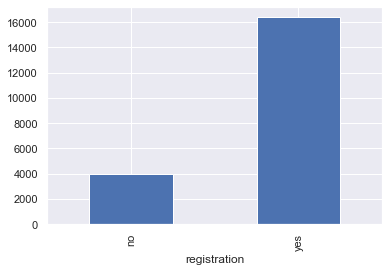

In [62]:
plt = CarSales_Data_copy[['price', 'registration']].groupby('registration').price.mean().plot(kind='bar')
plt

### 4.5. What is the car price distribution based on Engine Value?

<AxesSubplot:xlabel='engV', ylabel='price'>

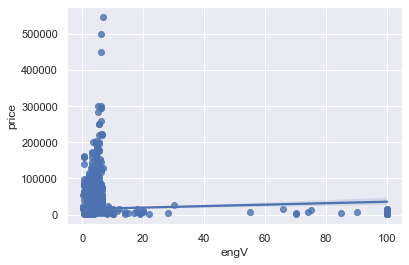

In [63]:
sns.regplot(x='engV',y='price',data = CarSales_Data_copy)

Except few outliers, it is clearly observed that the range of car price is between 0 to 150000 having the range of engine value between 0 to 6. 

<AxesSubplot:xlabel='engV', ylabel='price'>

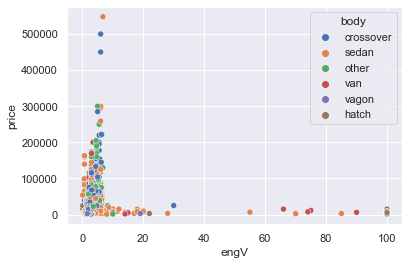

In [65]:
sns.scatterplot(x='engV',y='price', data=CarSales_Data_copy, hue='body')

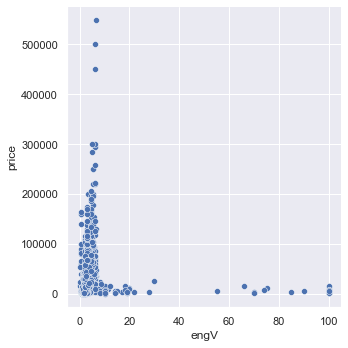

In [66]:
sns.relplot(data=CarSales_Data_copy,x='engV',y='price')

### 4.6. Which engine type of cars users preferred maximum?

Petrol cars are more preferred and followed by Diesel, Gas and others.

In [68]:
CarSales_Data_copy.groupby('engType')['price'].count().sort_values(ascending=False)

engType
Petrol    4259
Diesel    2821
Gas       1692
Other      443
Name: price, dtype: int64

C:\Users\ajha2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engType', ylabel='count'>

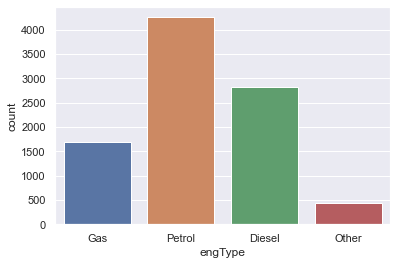

In [67]:
sns.countplot(CarSales_Data_copy['engType'])

### 4.7 Establish coorelation between all the features using heatmap.

In [73]:
corr_car_sales_data = CarSales_Data_copy.corr()
corr_car_sales_data

,price,mileage,engV,year
price,1.000000,-0.256693,0.051242,0.391745
mileage,-0.256693,1.000000,0.055425,-0.451794
engV,0.051242,0.055425,1.000000,-0.047734
year,0.391745,-0.451794,-0.047734,1.000000


TypeError: 'Text' object is not callable

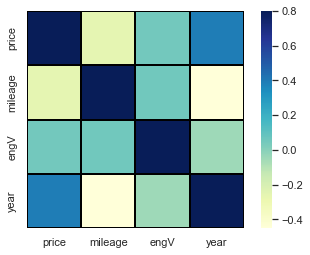

In [77]:
##plt.subplots(figsize=(10,10))
sns.heatmap(corr_car_sales_data,vmax = 0.8 , linewidth = 0.01 ,square = True,cmap = 'YlGnBu',linecolor = 'black')
plt.title('Correlation between features')

mileage and engV are negatively corelated with year.

mileage is also negatively corelated with year.

engV is positively coorelated with mileage and price.

Positive corelation observed between year and price too.

### 4.8 Distribution of price.

C:\Users\ajha2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


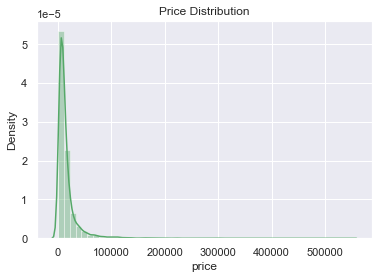

In [80]:
sns.distplot(CarSales_Data_copy['price'],color = 'g')
plt.title("Price Distribution")
plt.show()

The __'price'__ mostly varies between __0 and 80000.__

C:\Users\ajha2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

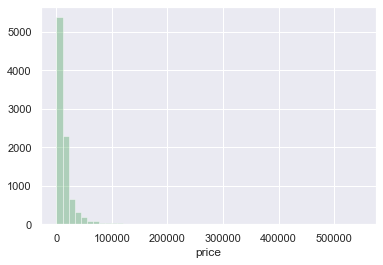

In [81]:
sns.distplot(CarSales_Data_copy['price'], color='g', kde=False) 

Conclusion:

Sedan cars sold maximum.

Price is increasing as the engine value is increasing.

The price and mileage goes down as engine values decreasing.

<AxesSubplot:xlabel='price', ylabel='Count'>

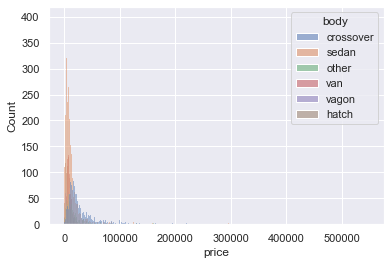

In [82]:
sns.histplot(data=CarSales_Data_copy, x="price", hue="body")